In [5]:
import numpy
import argparse
import logging

import torch

from architectures_v1.nru.utils.experiment import Experiment
from architectures_v1.nru.NRU import NRU
from architectures_v1.nru.mnist_task import PMNISTData
from architectures_v1.nru.utils.logging import Logger
from architectures_v1.nru.utils.utils import MyContainer, get_optimizer, create_config
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [2]:
# Create & plot data points
x = torch.linspace(0,799,steps=800)
y = torch.sin(x*2*3.1416/40)

test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

def input_data(seq,ws):  # ws is the window size
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

window_size = 40

# Create the training dataset of sequence/label tuples:
train_data = input_data(train_set, window_size)

In [15]:
config = {'device' : 'cpu',
          'input_size' : 40,
          'output_size' : 1,
          'num_layers' : 1,
          'layer_size': [50],
          'memory_size' : 32,
          'use_relu' : False,
          'layer_norm' : False,
          'k' : 2}

model = NRU(torch.device(config['device']),
            config['input_size'],
            config['output_size'],
            num_layers = config['num_layers'],
            layer_size = config['layer_size'],
            output_activation = "linear",
            layer_norm = config['layer_norm'], 
            use_relu = config['use_relu'], 
            memory_size = config['memory_size'],
            k = config['k']).to(config['device'])

total_params = 0
for p in model.parameters():
    total_params += p.numel()
print(f"Total parameters: {total_params}")

Num_params : 9189 
Total parameters: 9189


/Users/sergio.dorado/miniconda3/envs/sd_test_rnns/lib/python3.7/site-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 - Loss: 1.3554398719861638e-05
Performance on test range: 0.00019882801279891282


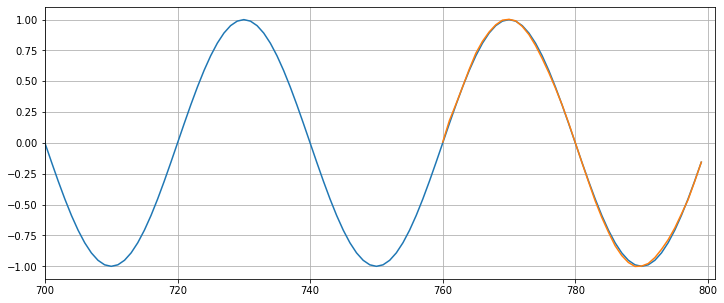

/Users/sergio.dorado/miniconda3/envs/sd_test_rnns/lib/python3.7/site-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1 - Loss: 3.281817953393329e-06
Performance on test range: 4.935714605380781e-05


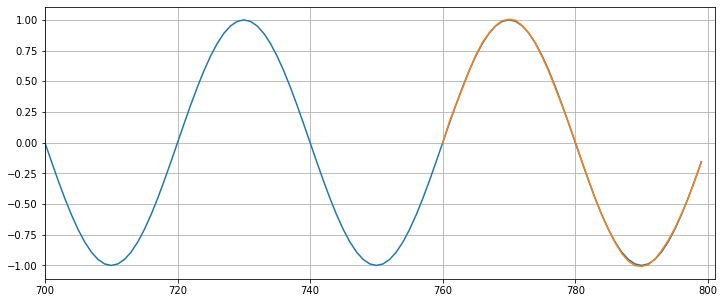

/Users/sergio.dorado/miniconda3/envs/sd_test_rnns/lib/python3.7/site-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 2 - Loss: 1.601744202162081e-06
Performance on test range: 2.7090864023193717e-05


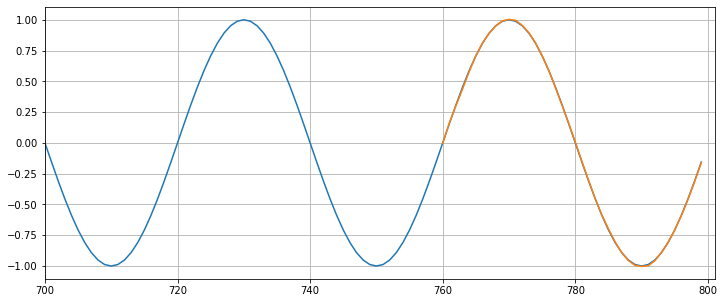

/Users/sergio.dorado/miniconda3/envs/sd_test_rnns/lib/python3.7/site-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 3 - Loss: 2.5737426767591387e-06
Performance on test range: 1.6064959709183313e-05


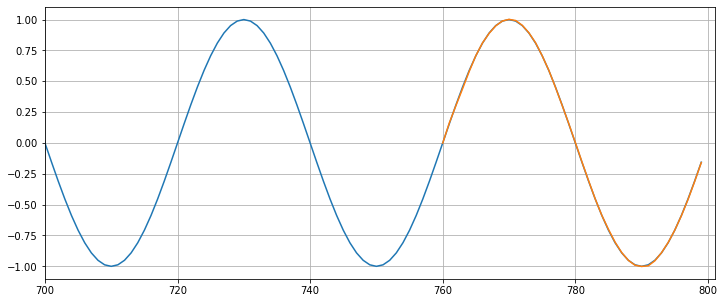

/Users/sergio.dorado/miniconda3/envs/sd_test_rnns/lib/python3.7/site-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 4 - Loss: 9.62776312007918e-07
Performance on test range: 9.516642421658617e-06


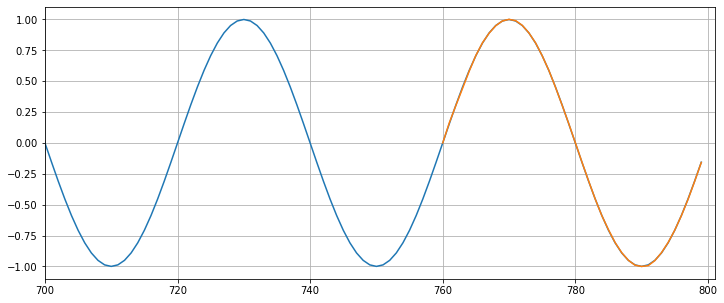

/Users/sergio.dorado/miniconda3/envs/sd_test_rnns/lib/python3.7/site-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 5 - Loss: 3.3104331009781163e-07
Performance on test range: 7.283858394657727e-06


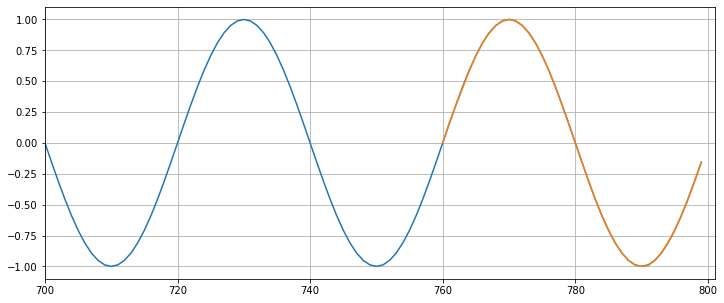

/Users/sergio.dorado/miniconda3/envs/sd_test_rnns/lib/python3.7/site-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 6 - Loss: 9.729783556622351e-08
Performance on test range: 5.756940936407773e-06


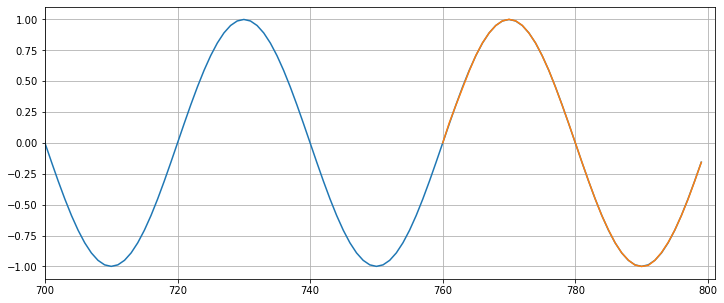

/Users/sergio.dorado/miniconda3/envs/sd_test_rnns/lib/python3.7/site-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 7 - Loss: 9.577001947036479e-08
Performance on test range: 4.968037046637619e-06


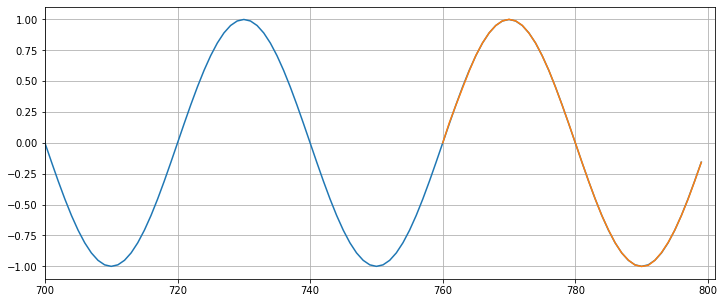

/Users/sergio.dorado/miniconda3/envs/sd_test_rnns/lib/python3.7/site-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 8 - Loss: 8.198247058999186e-08
Performance on test range: 4.320113475841936e-06


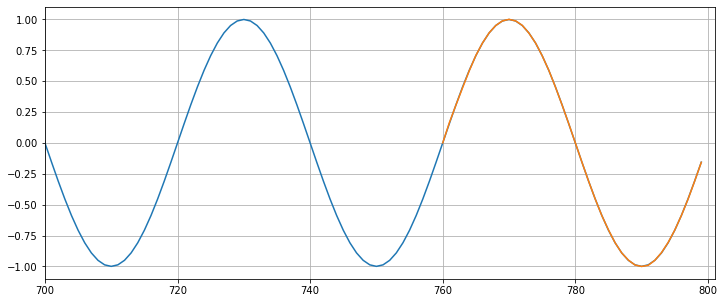

/Users/sergio.dorado/miniconda3/envs/sd_test_rnns/lib/python3.7/site-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 9 - Loss: 6.197052471179632e-08
Performance on test range: 3.849138010991737e-06


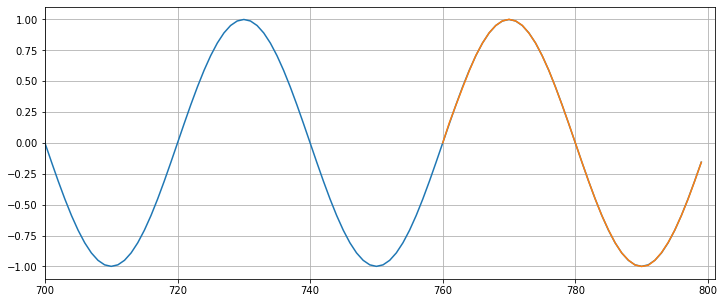

In [16]:
torch.manual_seed(42)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
model.register_optimizer(optimizer)

epochs = 10
future = 40

for epoch in range(epochs):
    
    for seq, y_train in train_data:
        
        x = torch.reshape(seq, (1, seq.shape[0]))
    
        model.reset_hidden(batch_size = 1)
        model.optimizer.zero_grad()
        
        y_pred = model.step(x)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        model.optimizer.step()
        
    print(f"Epoch: {epoch} - Loss: {loss.item()}")
    
    preds = train_set[-window_size:].tolist()
    
    for f in range(future):
        
        seq = torch.FloatTensor(preds[-window_size:])
        seq = torch.reshape(seq, (1, seq.shape[0]))
        
        with torch.no_grad():
            
            model.reset_hidden(batch_size = 1)
            preds.append(model.step(seq).item())
            
    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print(f"Performance on test range: {loss}")
          
    plt.figure(figsize = (12, 5))
    plt.xlim(700, 801)
    plt.grid(True)
          
    plt.plot(y.numpy())
    plt.plot(range(760, 800), preds[window_size:])
    plt.show()